In [1]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [4]:
x = np.array([53, 22, 45, 47, 21, 59, 60, 40, 25])
y = np.array([500, 45, 150, 160, 47, 580, 600, 155, 50])
data = np.column_stack((x,y))

In [5]:
linkage_matrix = sch.linkage(data,method='ward')

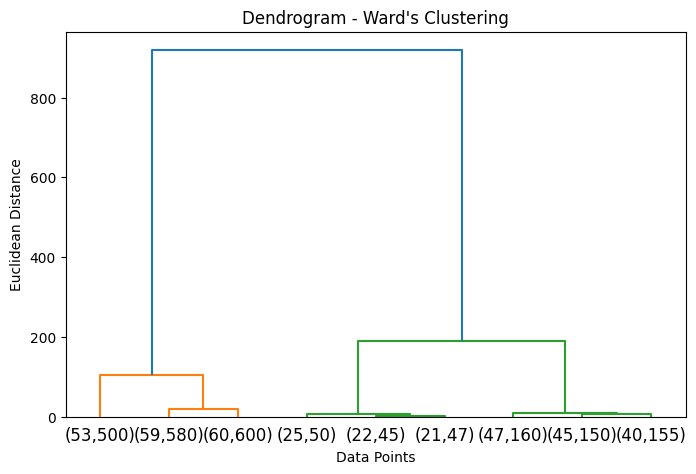

In [7]:
plt.figure(figsize=(8,5))
sch.dendrogram(linkage_matrix,labels=[f"({x[i]},{y[i]})" for i in range(len(x))])
plt.title("Dendrogram - Ward's Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(linkage_matrix, 3, criterion='maxclust')

In [9]:
def compute_sse(cluster_labels, data):
    clusters = {i: [] for i in np.unique(cluster_labels)}  # Dictionary for clusters

    # Group points by cluster
    for i, label in enumerate(cluster_labels):
        clusters[label].append(data[i])

    # Compute SSE for each cluster
    sse_values = {}
    total_sse = 0
    for cluster_id, points in clusters.items():
        points = np.array(points)  # Convert to NumPy array
        centroid = np.mean(points, axis=0)  # Compute centroid
        sse = np.sum(np.linalg.norm(points - centroid, axis=1) ** 2)  # Compute SSE
        sse_values[cluster_id] = sse  # Store SSE for this cluster
        total_sse += sse  # Accumulate total SSE

    return sse_values, total_sse

In [10]:
sse_values, total_sse = compute_sse(cluster_labels, data)

# Print results
print("Clusters formed:", {i: [] for i in np.unique(cluster_labels)})
for i in range(len(data)):
    print(f"Point {data[i]} → Cluster {cluster_labels[i]}")

print("\nSSE for each cluster:", sse_values)
print("Total SSE:", total_sse)

Clusters formed: {np.int32(1): [], np.int32(2): [], np.int32(3): []}
Point [ 53 500] → Cluster 1
Point [22 45] → Cluster 2
Point [ 45 150] → Cluster 3
Point [ 47 160] → Cluster 3
Point [21 47] → Cluster 2
Point [ 59 580] → Cluster 1
Point [ 60 600] → Cluster 1
Point [ 40 155] → Cluster 3
Point [25 50] → Cluster 2

SSE for each cluster: {np.int32(1): np.float64(5628.666666666667), np.int32(2): np.float64(21.333333333333336), np.int32(3): np.float64(76.0)}
Total SSE: 5726.0
